Assignment 3: Data Visualization

Taylor M. Smith

Winter 2023

--

**Part 1:**

- Using the built-in Seaborn dataset mpg, provide a heatmap of the correlation of all the numeric columns and provide a pairplot of the same.

In [90]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from sklearn import preprocessing

In [91]:
# importing and heading data
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


/var/folders/z1/hcmzk_5n3n3_zfcfbdyhvblc0000gn/T/ipykernel_39291/2361143716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'winter')


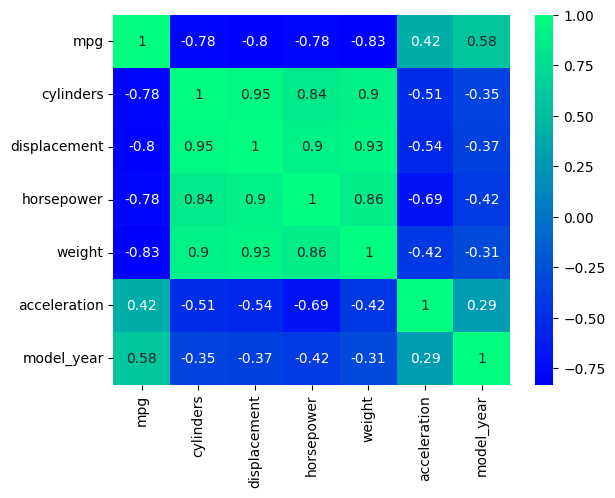

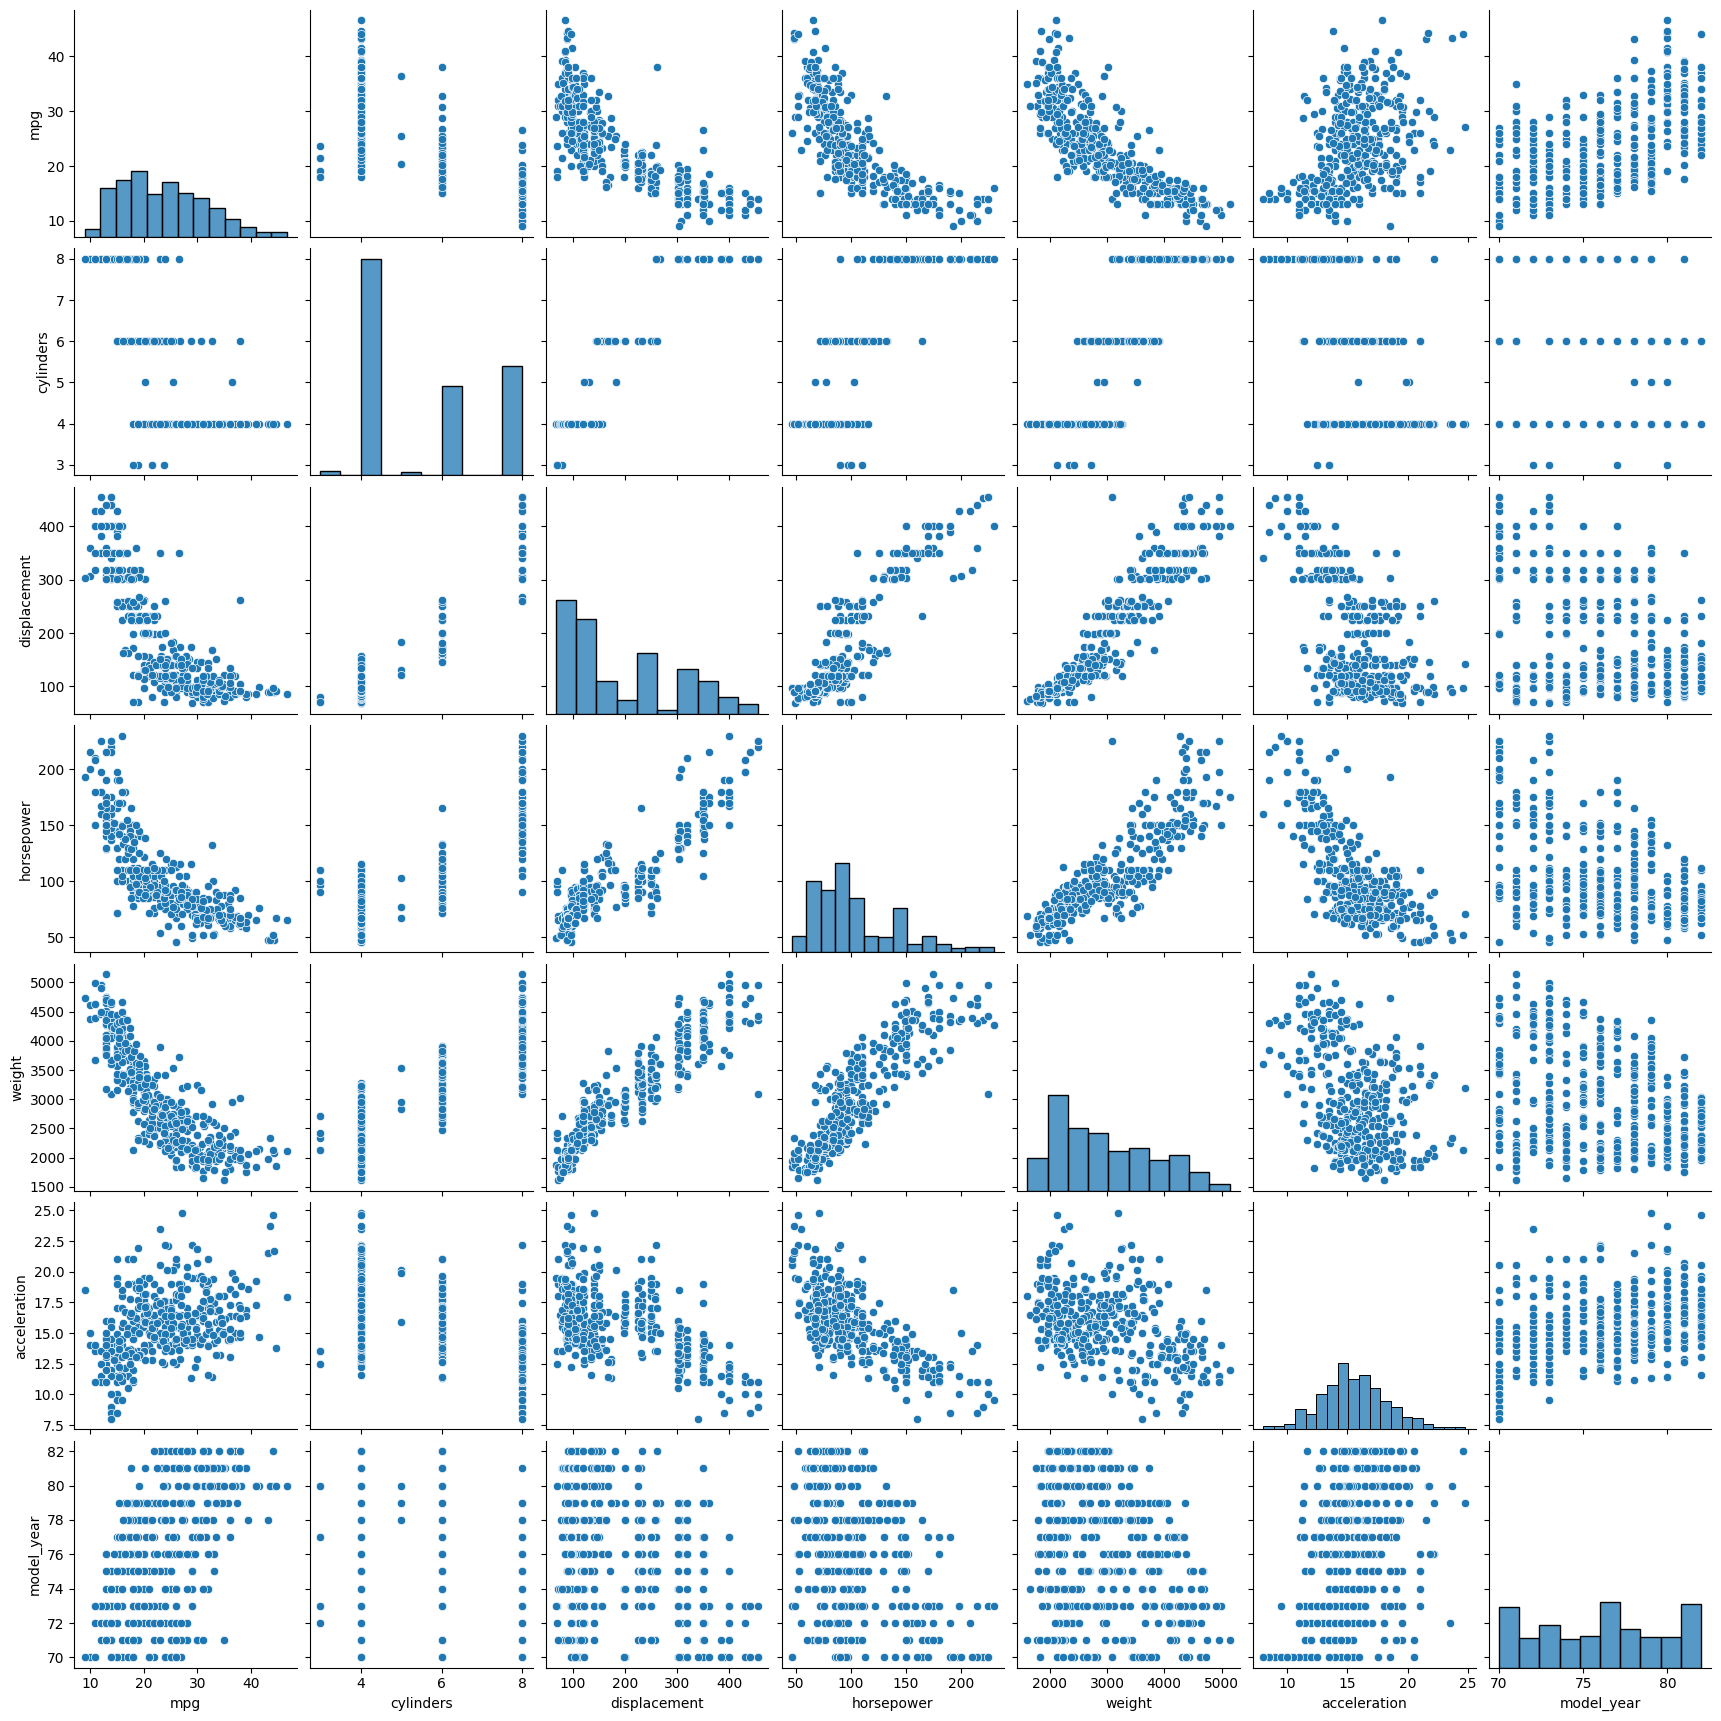

In [51]:
# heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'winter')

# creating a pairplot
sns.pairplot(df)
plt.show()

**Part 2:**

- Using the built-in Seaborn dataset diamonds, establish a FacetGrid based on ‘cut’ and ‘color’.
-  Eliminate colors ‘D’ and ‘E’ as well as the cut ‘Fair’. 
- Within that grid, plot the scatterplot for ‘price’ vs. ‘carat’

In [55]:
# importing and heading data
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


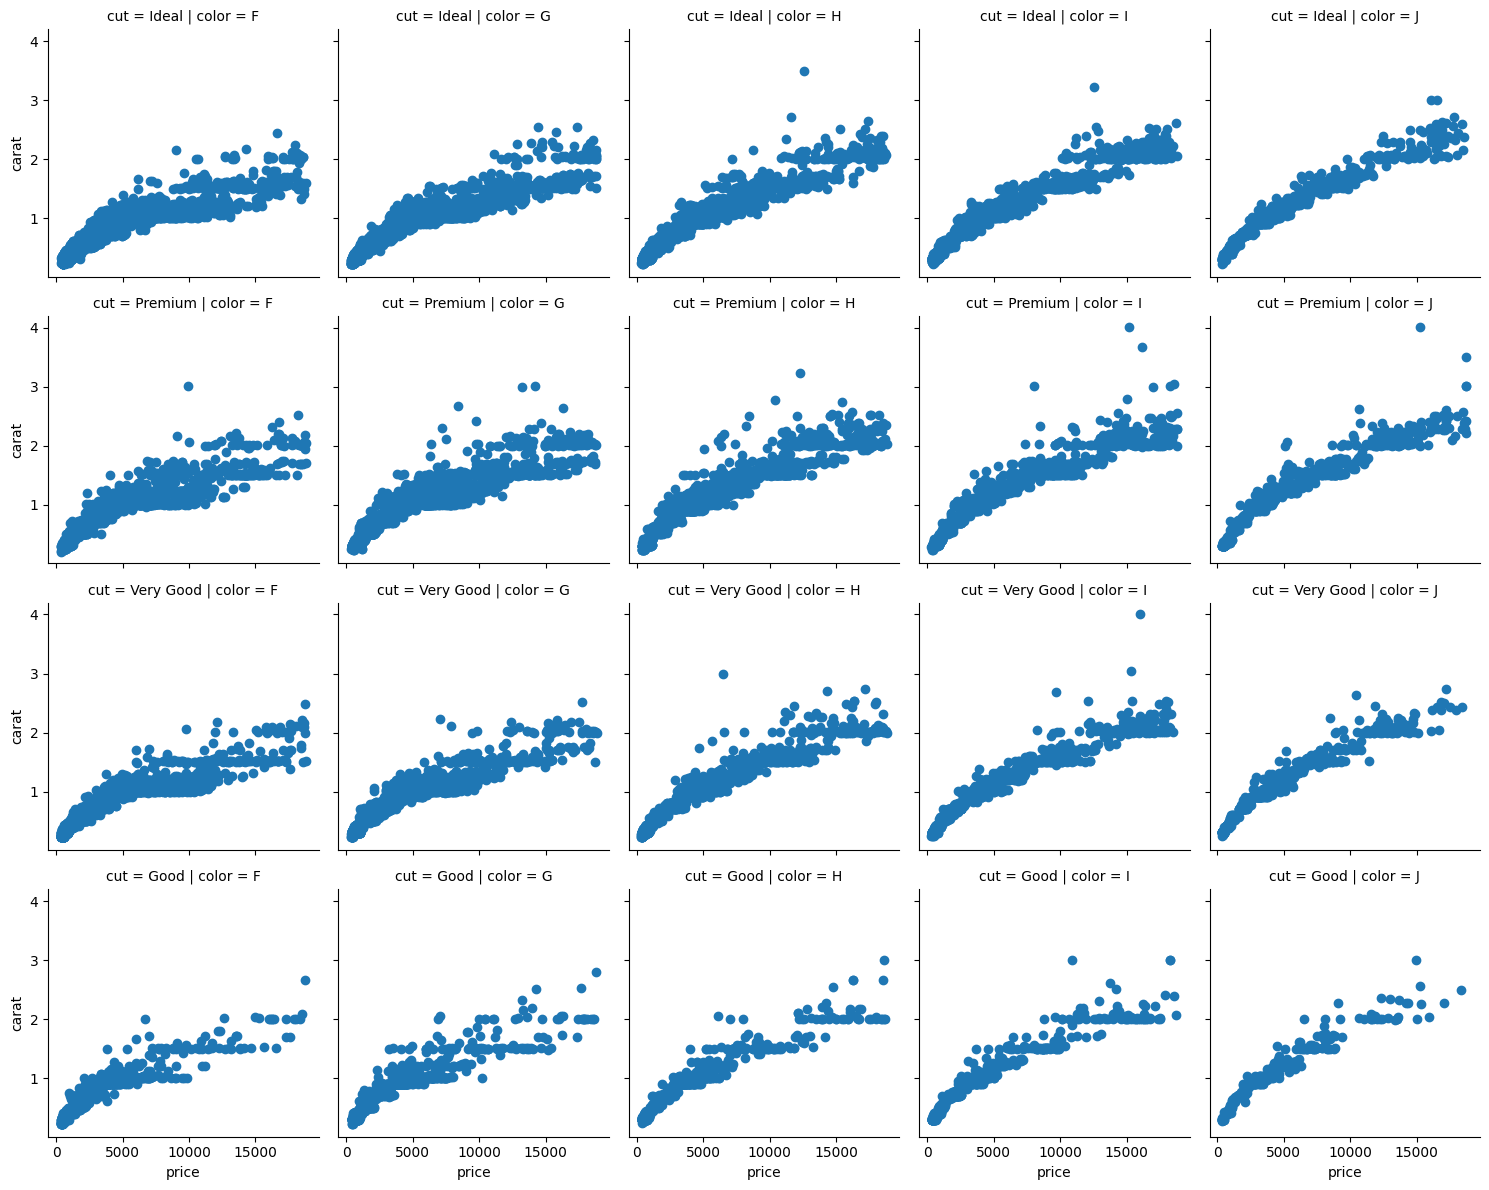

In [54]:
# builidng out FacetGrid on diamonds df
grid = sns.FacetGrid(diamonds, row = 'cut', col = 'color')

# eliminating colors D & E & cut 'fair'
diamonds = diamonds[(~diamonds.color.isin(['D', 'E'])) & (diamonds.cut!='Fair')]
diamonds['color'] = diamonds['color'].cat.remove_unused_categories()
diamonds['cut'] = diamonds['cut'].cat.remove_unused_categories()

#scatterplot of 'plot' vs 'caret'
grid.map(plt.scatter, 'price', 'carat')

**Part 3:**

- Using the built-in Seaborn dataset car_crashes, prepare plots with a scattergram with the linear model for both the total vs. speeding and the total vs. alcohol.

In [56]:
# importing and heading data
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


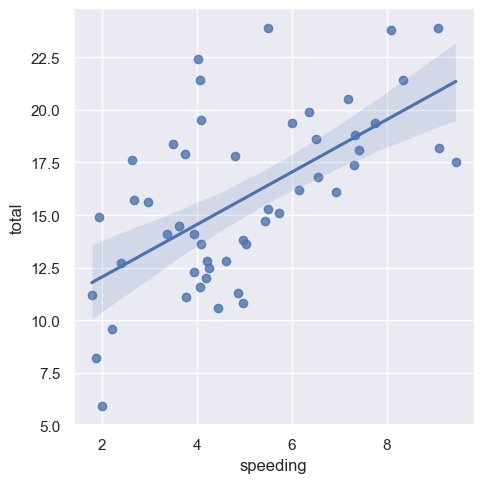

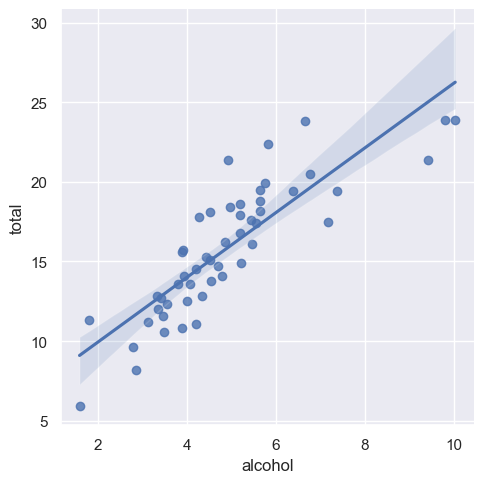

In [85]:
# total vs. speeding
sns.lmplot(x = "speeding", y="total", data = crashes)

# total vs. alcohol
sns.lmplot(x = "alcohol", y="total", data= crashes)

# showing plots
plt.show()

**Part 4:**

-  Using the built-in Seaborn dataset iris, provide a plot with four subplots wherein the distribution of each of the numeric columns is presented as a set of boxplots, one for each ‘species’.

In [87]:
# importing and heading data
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


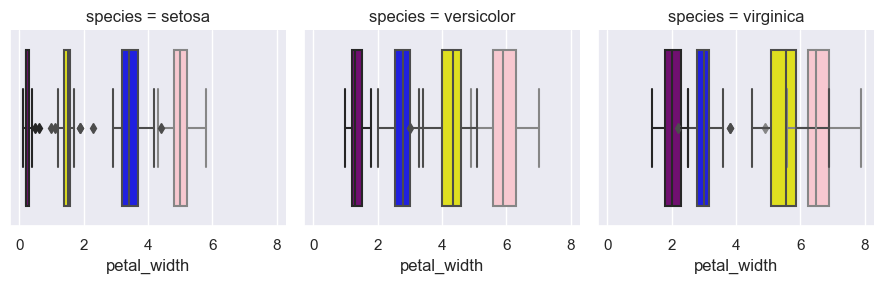

In [89]:
# subplots created
subs = sns.FacetGrid(iris, col = "species", height = 3)

# boxplot for each subplot
subs = subs.map(sns.boxplot, "sepal_length", color = "pink")
subs = subs.map(sns.boxplot, "sepal_width", color = "blue")
subs = subs.map(sns.boxplot, "petal_length", color = "yellow")
subs = subs.map(sns.boxplot, "petal_width", color = "purple")

# showing plot
plt.show()